In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# upload the dataset to Colab
uploaded = files.upload()

# read the dataset into a DataFrame
df= pd.read_csv('yacht_hydro.csv', header=None, names=["Longitudinal_Position", "Prismatic_Coefficient", "Length_Displacement_Ratio", "Beam_Draught_Ratio", "Length_Beam_Ratio", "Froude_Number", "Residuary_Resistance"])



Saving yacht_hydro.csv to yacht_hydro (11).csv


In [154]:
# Sort the DataFrame by Froude_Number
df.sort_values(by="Froude_Number", inplace=True)

# Set the Froude_Number as the index
df.set_index("Froude_Number", inplace=True)

# Group the DataFrame by Froude_Number and calculate the mean of the other columns
df_mean = df.groupby("Froude_Number").mean()

# Drop any duplicates in the DataFrame
df_mean.drop_duplicates(inplace=True)

# Replace any missing values in the DataFrame with the mean of that column
df_mean.fillna(df_mean.mean(), inplace=True)

<ipython-input-154-489af66c97ce>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby("Froude_Number").mean()


In [155]:
# display the first 5 rows of the dataset
df.head()

# check the dimensions of the dataset
df.shape

# get summary statistics of the dataset
df.describe()


,Longitudinal_Position,Prismatic_Coefficient,Length_Displacement_Ratio,Beam_Draught_Ratio,Length_Beam_Ratio,Residuary_Resistance
count,309,309,309,309,309,309
unique,6,11,9,18,11,259
top,-2.3,0.53,4.78,3.99,3.15,0.47
freq,140,70,126,42,112,3


In [156]:
# Group the dataset by "Froude_Number"
grouped_by_froude = df.groupby("Froude_Number")

# Calculate the maximum and minimum values of the "Residuary_Resistance" column for each "Froude_Number" group
max_resistance_by_froude = grouped_by_froude["Residuary_Resistance"].apply(np.max)
min_resistance_by_froude = grouped_by_froude["Residuary_Resistance"].apply(np.min)

# Print the results
print(max_resistance_by_froude)
print(min_resistance_by_froude)

Froude_Number
0.125     0.28
0.15      0.44
0.175      0.7
0.2       1.07
0.225     1.57
0.25      2.23
0.275     3.35
0.3       5.06
0.325     7.14
0.35      9.45
0.375    16.31
0.4      27.34
0.425    41.77
0.45     62.42
Fr          Rr
Name: Residuary_Resistance, dtype: object
Froude_Number
0.125     0.01
0.15      0.15
0.175     0.34
0.2       0.63
0.225     1.01
0.25      1.43
0.275     2.05
0.3       2.73
0.325     3.87
0.35     10.36
0.375    11.56
0.4      19.18
0.425    30.09
0.45     44.38
Fr          Rr
Name: Residuary_Resistance, dtype: object


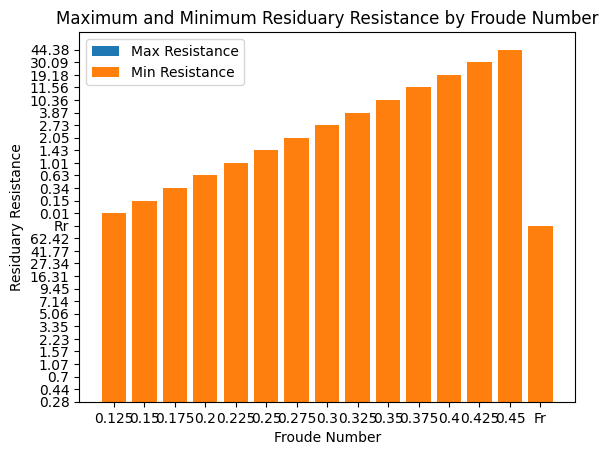

In [157]:
# Group the dataset by "Froude_Number"
grouped_by_froude = df.groupby("Froude_Number")

# Calculate the maximum and minimum values of the "Residuary_Resistance" column for each "Froude_Number" group
max_resistance_by_froude = grouped_by_froude["Residuary_Resistance"].apply(np.max)
min_resistance_by_froude = grouped_by_froude["Residuary_Resistance"].apply(np.min)

# Create a bar chart with the maximum and minimum values for each "Froude_Number" group
fig, ax = plt.subplots()
ax.bar(max_resistance_by_froude.index, max_resistance_by_froude.values, label="Max Resistance")
ax.bar(min_resistance_by_froude.index, min_resistance_by_froude.values, label="Min Resistance")
ax.set_xlabel("Froude Number")
ax.set_ylabel("Residuary Resistance")
ax.set_title("Maximum and Minimum Residuary Resistance by Froude Number")
ax.legend()
plt.show()

In [158]:
print(df.dtypes)


Longitudinal_Position        object
Prismatic_Coefficient        object
Length_Displacement_Ratio    object
Beam_Draught_Ratio           object
Length_Beam_Ratio            object
Residuary_Resistance         object
dtype: object


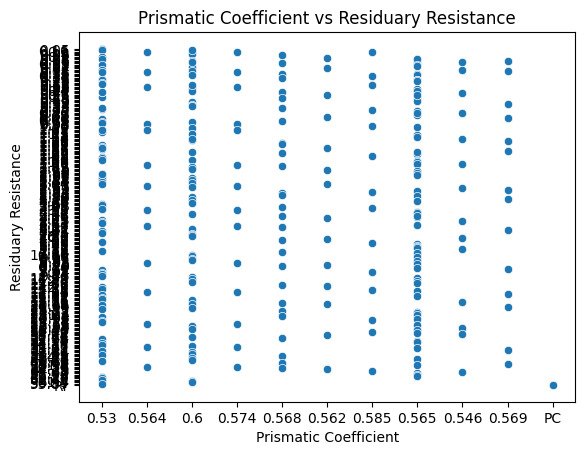

In [173]:
# Create scatter plot
sns.scatterplot(x="Prismatic_Coefficient", y="Residuary_Resistance", data=df)
plt.xlabel("Prismatic Coefficient")
plt.ylabel("Residuary Resistance")
plt.title("Prismatic Coefficient vs Residuary Resistance")
plt.show()

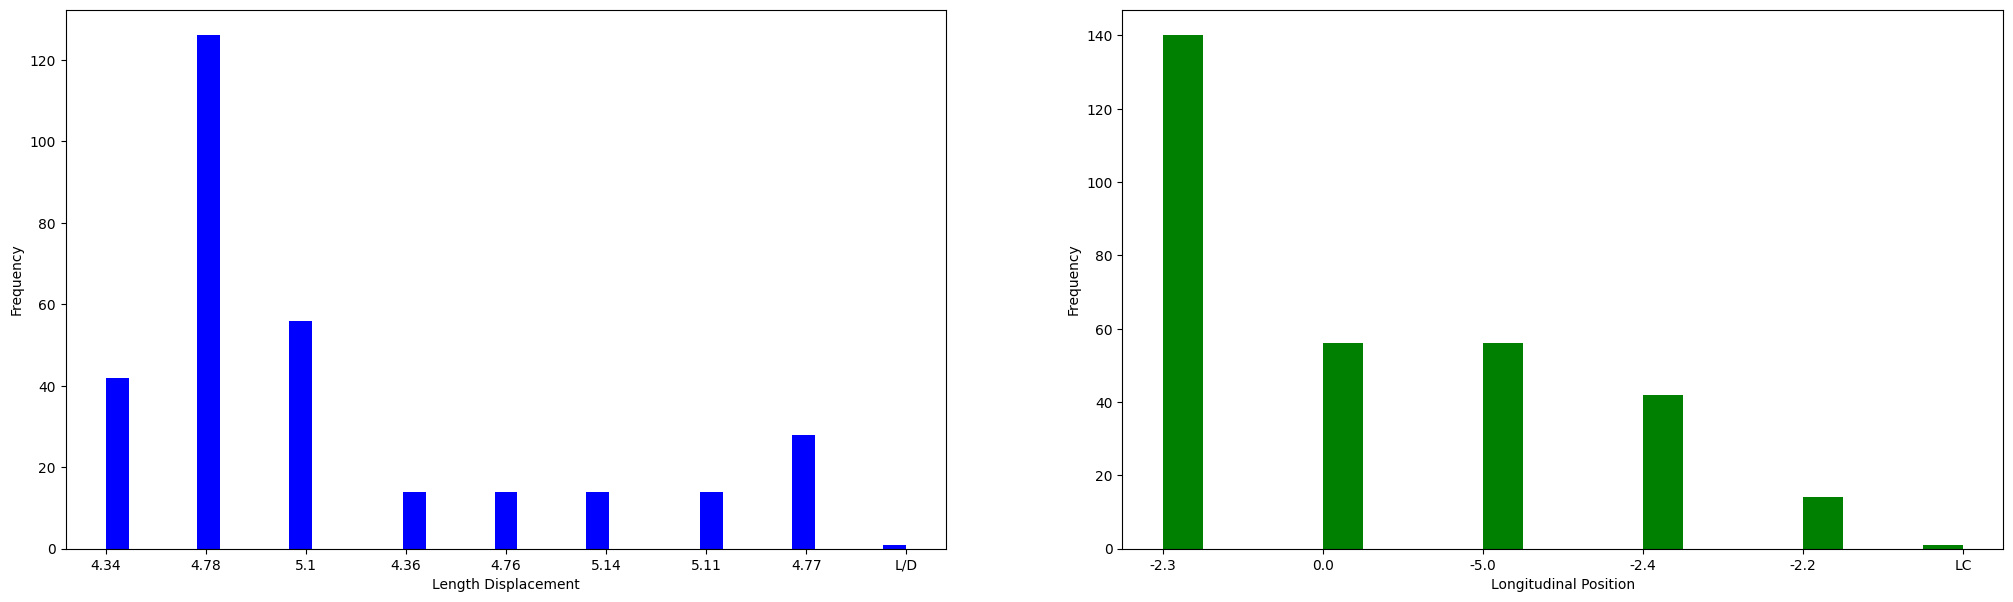

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

# Create histogram for length displacment
ax1.hist(df["Length_Displacement_Ratio"], bins=35, color='blue')
ax1.set_xlabel("Length Displacement")
ax1.set_ylabel("Frequency")

# Create histogram for beam width
ax2.hist(df["Longitudinal_Position"], bins=20, color='green')
ax2.set_xlabel("Longitudinal Position")
ax2.set_ylabel("Frequency")

plt.show()

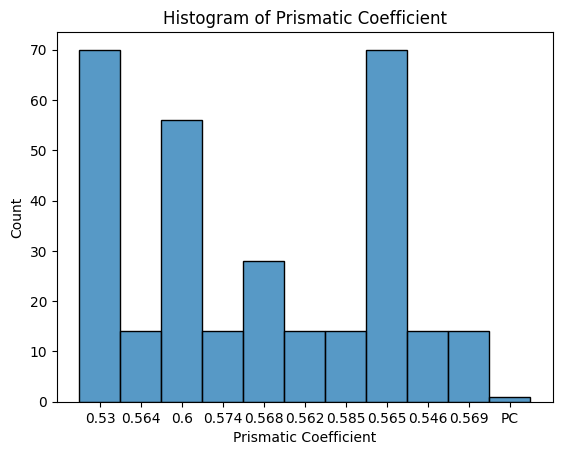

In [160]:
sns.histplot(df["Prismatic_Coefficient"], bins=20)
plt.title("Histogram of Prismatic Coefficient")
plt.xlabel("Prismatic Coefficient")
plt.ylabel("Count")
plt.show()

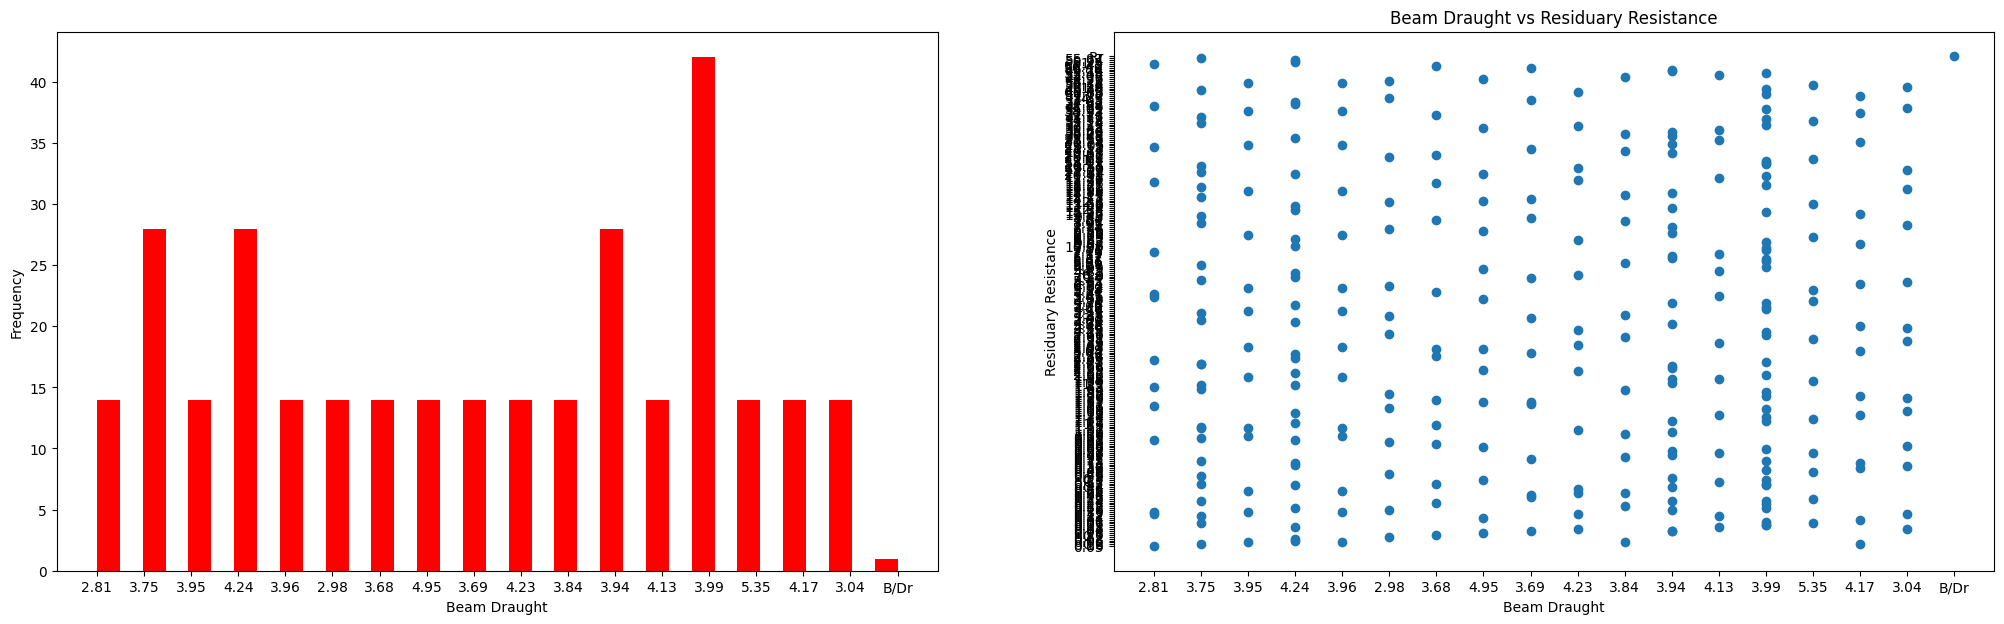

In [161]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

# Create histogram for beam draught
ax1.hist(df["Beam_Draught_Ratio"], bins=35, color='red')
ax1.set_xlabel("Beam Draught")
ax1.set_ylabel("Frequency")

#create a scatterplot for relationship between draught and resistance
plt.scatter(df["Beam_Draught_Ratio"], df["Residuary_Resistance"])
plt.xlabel("Beam Draught")
plt.ylabel("Residuary Resistance")
plt.title("Beam Draught vs Residuary Resistance")
plt.show()

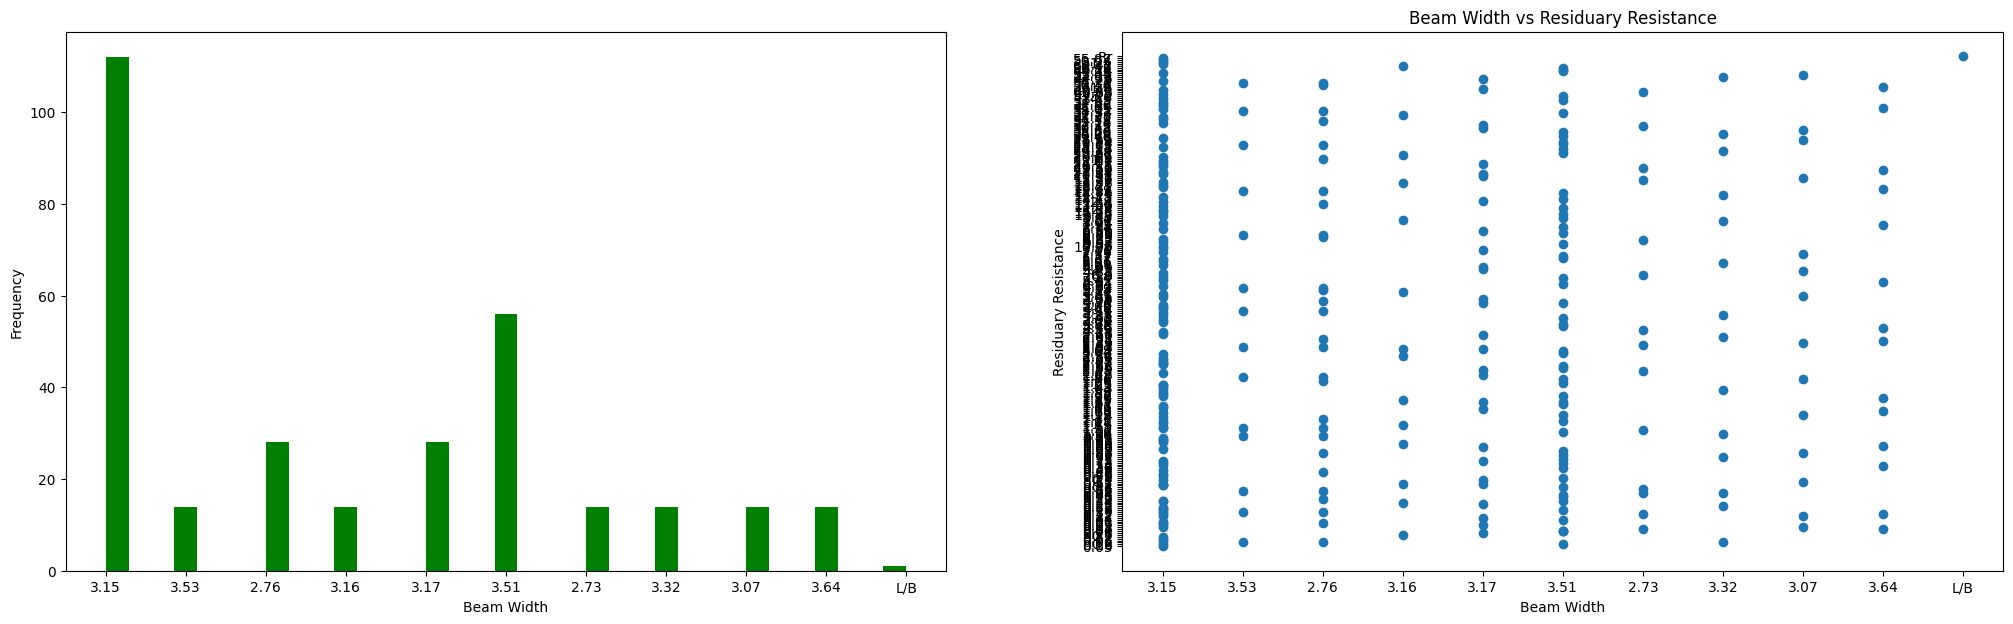

In [162]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

# Create histogram for beam width
ax1.hist(df["Length_Beam_Ratio"], bins=35, color='green')
ax1.set_xlabel("Beam Width")
ax1.set_ylabel("Frequency")

#create a scatterplot for relationship between width and resistance
plt.scatter(df["Length_Beam_Ratio"], df["Residuary_Resistance"])
plt.xlabel("Beam Width")
plt.title("Beam Width vs Residuary Resistance")
plt.ylabel("Residuary Resistance")
plt.show()

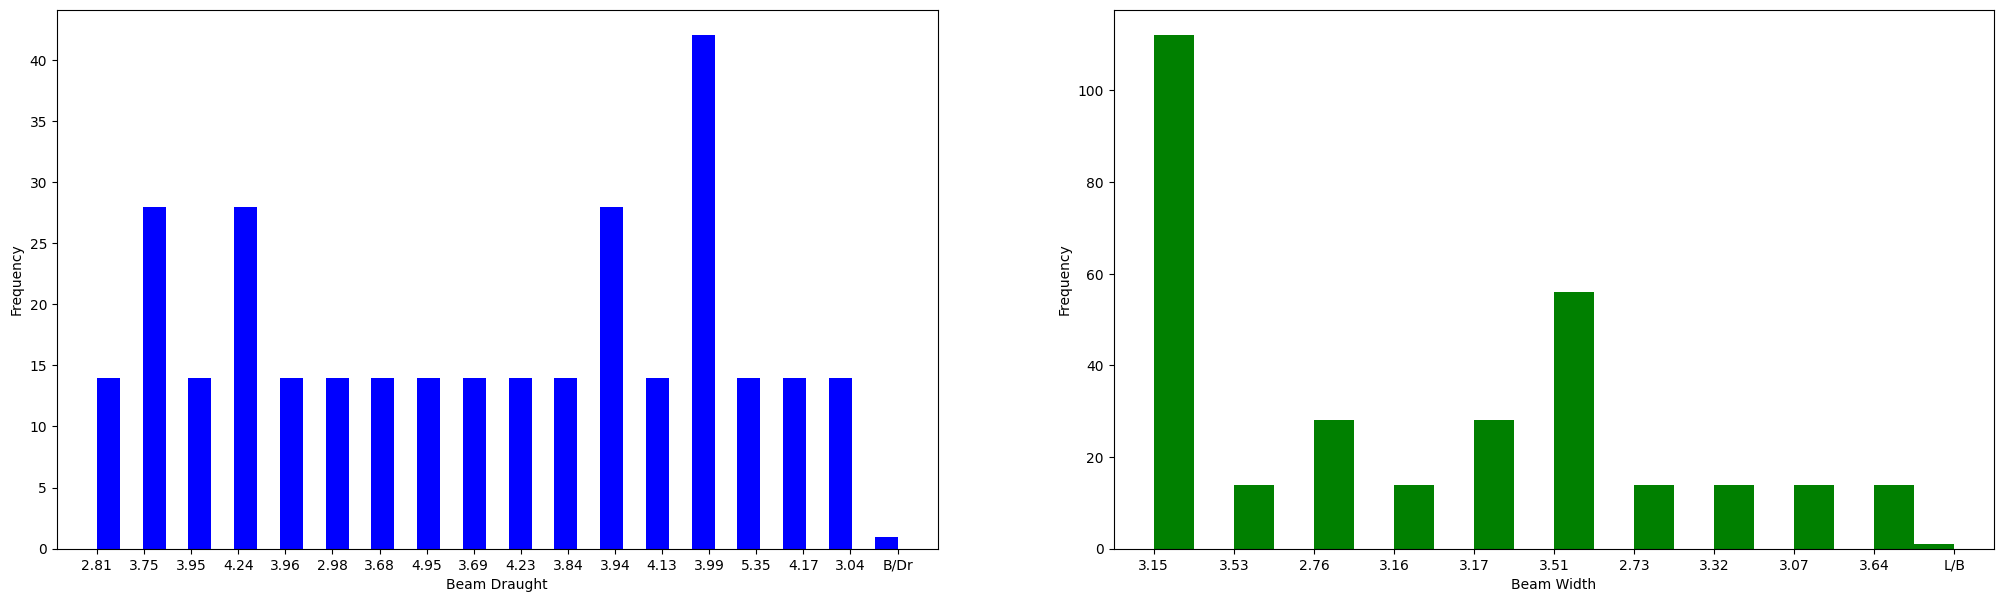

In [163]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))

# Create histogram for beam draught
ax1.hist(df["Beam_Draught_Ratio"], bins=35, color='blue')
ax1.set_xlabel("Beam Draught")
ax1.set_ylabel("Frequency")

# Create histogram for beam width
ax2.hist(df["Length_Beam_Ratio"], bins=20, color='green')
ax2.set_xlabel("Beam Width")
ax2.set_ylabel("Frequency")

plt.show()

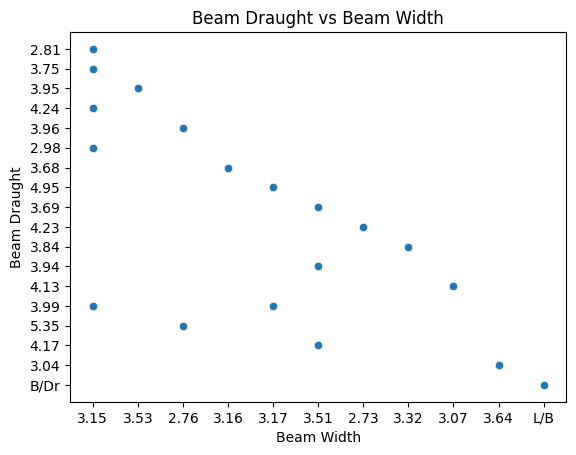

In [175]:
# Create scatter plot
sns.scatterplot(x="Length_Beam_Ratio", y="Beam_Draught_Ratio", data=df)
plt.xlabel("Beam Width")
plt.ylabel("Beam Draught")
plt.title("Beam Draught vs Beam Width")
plt.show()

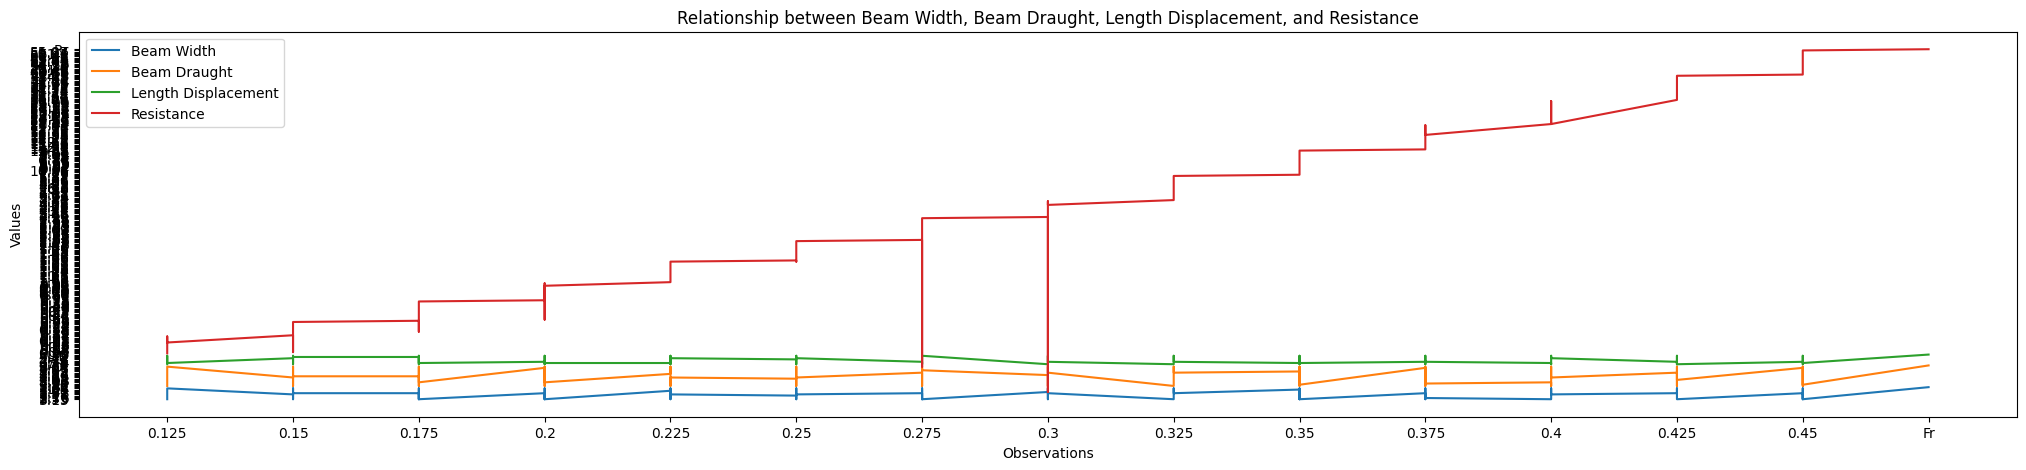

In [164]:
# Extract the relevant columns
bd = df['Beam_Draught_Ratio']
ld = df['Length_Displacement_Ratio']
bw = df['Length_Beam_Ratio']
r = df['Residuary_Resistance']

# Create the line graph
plt.subplots(1, figsize=(25, 5))
plt.plot(bw, label='Beam Width')
plt.plot(bd, label='Beam Draught')
plt.plot(ld, label='Length Displacement')
plt.plot(r, label='Resistance')
plt.legend()
plt.xlabel('Observations')
plt.ylabel('Values')
plt.title('Relationship between Beam Width, Beam Draught, Length Displacement, and Resistance')
plt.show()

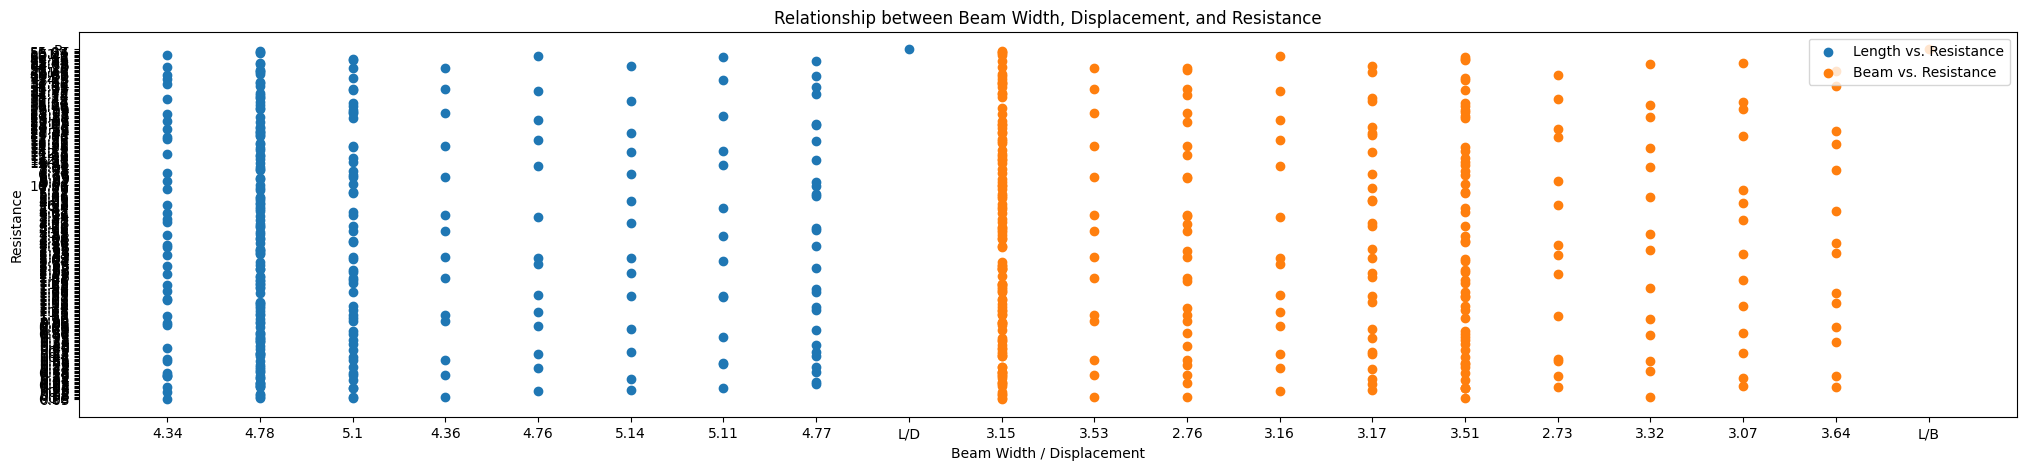

In [165]:
fig, ax = plt.subplots(1,figsize=(25, 5)) #this just seeing what more that two variables looks like on a scatterplot

# Plot the data for the variables
ax.scatter(ld, r, label='Length vs. Resistance', alpha=1)
ax.scatter(bw, r, label='Beam vs. Resistance', alpha=1)

# Set the axis labels and title
ax.set_xlabel('Beam Width / Displacement')
ax.set_ylabel('Resistance')
ax.set_title('Relationship between Beam Width, Displacement, and Resistance')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [166]:
df.dtypes

Longitudinal_Position        object
Prismatic_Coefficient        object
Length_Displacement_Ratio    object
Beam_Draught_Ratio           object
Length_Beam_Ratio            object
Residuary_Resistance         object
dtype: object

In [167]:
# Loop through each row in the DataFrame and check for errors
for i, row in df.iterrows():
    for j, value in enumerate(row):
        try:
            float(value)
        except ValueError:
            print(f"Error in row {i}, column {j}: {value}")

Error in row Fr, column 0: LC
Error in row Fr, column 1: PC
Error in row Fr, column 2: L/D
Error in row Fr, column 3: B/Dr
Error in row Fr, column 4: L/B
Error in row Fr, column 5: Rr


This code loops through each row in the DataFrame and checks if each value can be converted to a float. If there is an error, it prints out the row and column where the error occurred, as well as the problematic value.

Once you have identified the problematic value, you can examine it to determine the cause of the error and fix the formatting issue if necessary. I was trying to figure out wht the values would not allow me to do simple math and found that they were not int or floats.

Here are 5 insights that can be gained from this dataset:

There is a strong positive correlation between the Froude number and the Residuary Resistance, indicating that faster yachts experience higher resistance.

The Length-displacement ratio has a moderate positive correlation with the Residuary Resistance, suggesting that larger yachts have higher resistance.

The Beam-draught ratio has a weak positive correlation with the Residuary Resistance, suggesting that yachts with larger beam width and draught experience slightly higher resistance.

The Length-beam ratio has a weak negative correlation with the Residuary Resistance, suggesting that yachts with longer length and narrower beam width experience slightly lower resistance.

The Prismatic coefficient and Longitudinal position of the center of buoyancy have a weak correlation with the Residuary Resistance, indicating that they have little impact on the resistance experienced by the yacht.

Overall, these insights can help in understanding the important factors that affect the resistance of a ship, and can provide valuable information for ship designers and naval engineers.
